<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Insurance_Cost_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, GridSearchCV
%matplotlib inline

In [ ]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

In [ ]:
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [ ]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [ ]:
df.replace('?', np.NaN, inplace=True)

In [ ]:
df.head(6)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [ ]:
misssing_data = df.isnull()
for column in misssing_data.columns.values.tolist():
  print(misssing_data[column].value_counts(),'\n')
  #print("")

age
False    2768
True        4
Name: count, dtype: int64 

gender
False    2772
Name: count, dtype: int64 

bmi
False    2772
Name: count, dtype: int64 

no_of_children
False    2772
Name: count, dtype: int64 

smoker
False    2765
True        7
Name: count, dtype: int64 

region
False    2772
Name: count, dtype: int64 

charges
False    2772
Name: count, dtype: int64 



In [ ]:
avg_age = df['age'].astype("float").mean(axis=0)
df['age'] = df['age'].replace(np.NaN, avg_age)

is_smoker = df['smoker'].value_counts().idxmax()
df['smoker'] = df['smoker'].replace(np.NaN, is_smoker)

df[['age', 'smoker']] = df[['age', 'smoker']].astype("int")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [ ]:
df[['charges']] = df[['charges']].round(2)
df['charges'][0:5]

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


In [ ]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


(0.0, 66902.85800000001)

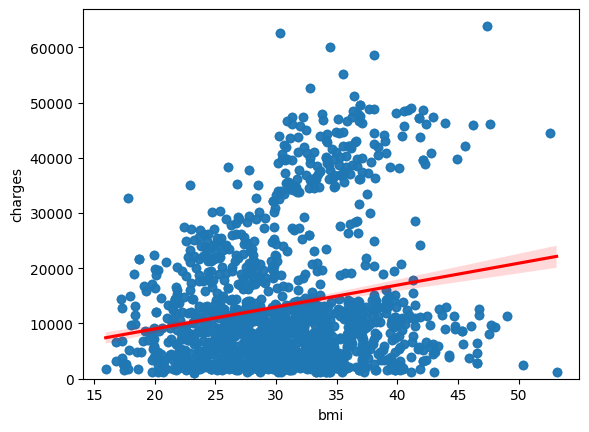

In [ ]:
sns.regplot(x='bmi', y='charges', data=df, line_kws={'color':'red'})
plt.ylim(0,)

In [ ]:
df[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.199846
charges,0.199846,1.000000


<Axes: xlabel='smoker', ylabel='charges'>

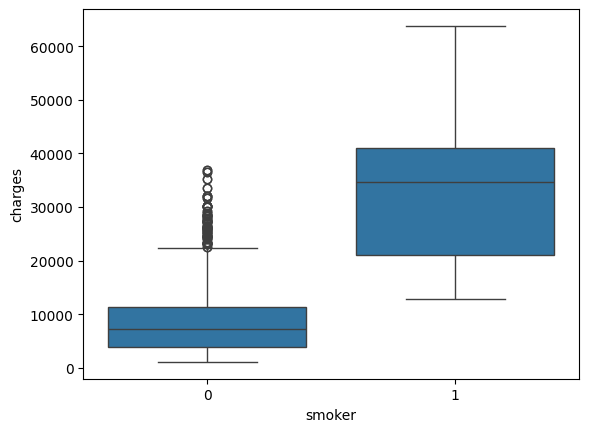

In [ ]:
sns.boxplot(x='smoker', y='charges', data=df)

In [ ]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [ ]:
df.describe(include='all')

,age,gender,bmi,no_of_children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,1.507215,30.701349,1.101732,0.203463,2.559885,13261.369957
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.130761,12151.768970
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.870000
25%,26.000000,1.000000,26.220000,0.000000,0.000000,2.000000,4687.800000
50%,39.000000,2.000000,30.447500,1.000000,0.000000,3.000000,9333.015000
75%,51.000000,2.000000,34.770000,2.000000,0.000000,4.000000,16577.780000
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.430000


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['smoker'], df['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.788783350098377  with a P-value of P = 0.0


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bmi'], df['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.19984605168370886  with a P-value of P = 2.29351916547895e-26


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['age'], df['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.29862366165523724  with a P-value of P = 3.3160850120110425e-58


In [ ]:
df_group_one = df[['gender', 'smoker', 'charges']]
df_grouped = df_group_one.groupby(['smoker', 'gender'], as_index=False).mean()
df_grouped

,smoker,gender,charges
0,0,1,8756.306931
1,0,2,8060.535009
2,1,1,30721.380517
3,1,2,33272.561988


In [ ]:
grouped_pivot = df_grouped.pivot(index='smoker', columns='gender')
grouped_pivot

charges              
gender             1             2
smoker                            
0        8756.306931   8060.535009
1       30721.380517  33272.561988

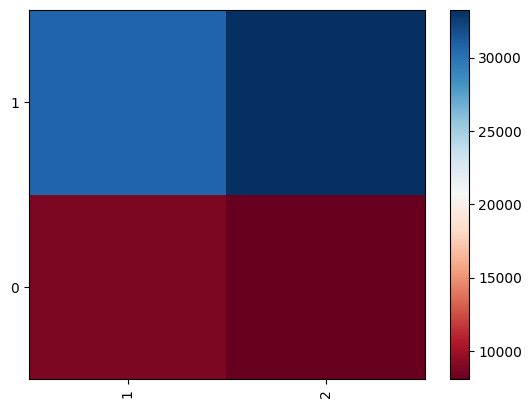

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [ ]:
X = df[['smoker']]
Y = df[['charges']]
lr = LinearRegression()
lr.fit(X, Y)
R_sqr = lr.score(X, Y)
Yhat = lr.predict(X)
mse = mean_squared_error(Y, Yhat)
print('R^2=', R_sqr, '\nMSE=', mse)
print(f'Yhat = {lr.intercept_.ravel()} + {lr.coef_.ravel()} * X')

R^2= 0.6221791733924185 
MSE= 55770970.49293007
Yhat = [8417.87439312] + [23805.26542958] * X


In [ ]:
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
Y = df[['charges']]
lr_Z = LinearRegression()
lr_Z.fit(Z, Y)
R_sqr_Z = lr_Z.score(Z, Y)
Yhat_Z = lr_Z.predict(Z)
mse_Z = mean_squared_error(Y, Yhat_Z)
print('R^2=', R_sqr_Z, '\nMSE=', mse_Z)
print(f'Yhat_Z = {lr_Z.intercept_.ravel()} + {lr_Z.coef_.ravel()} * X')

R^2= 0.7504083820289634 
MSE= 36842772.50180054
Yhat_Z = [-11335.50408979] + [  255.67496013   -52.2547249    328.35529713   497.651344
 24001.46095435  -326.7228072 ] * X


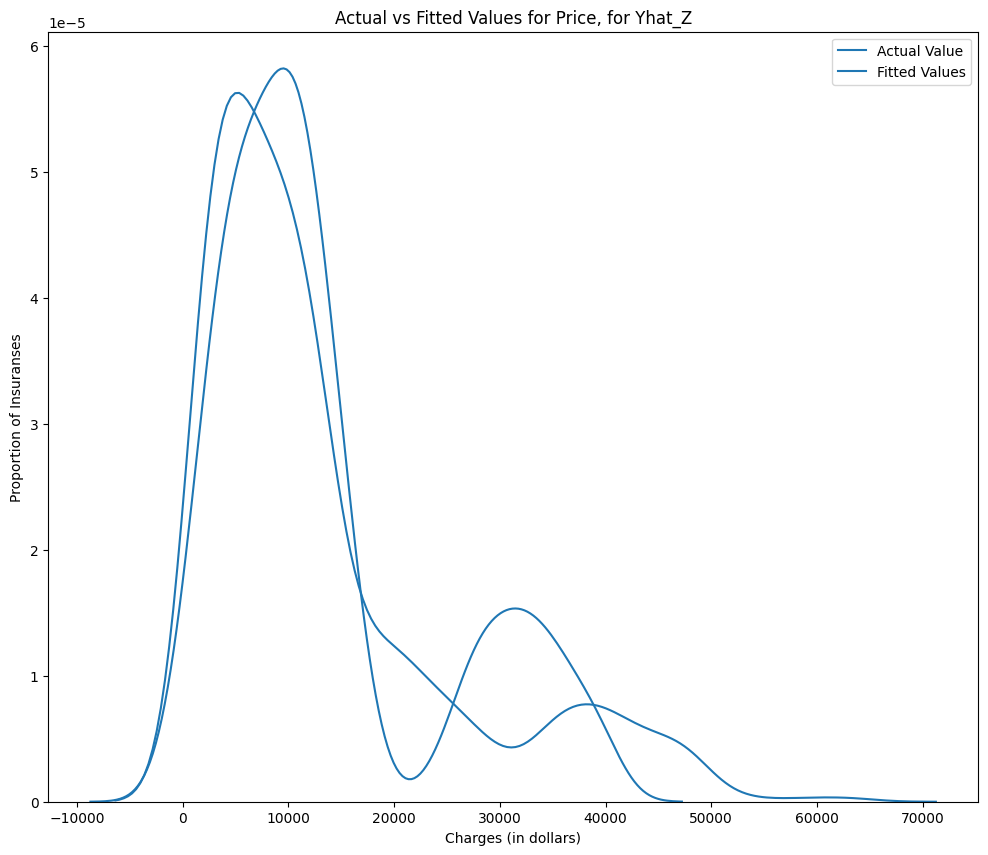

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.kdeplot(Y, color="r", label="Actual Value")
sns.kdeplot(Yhat_Z, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price, for Yhat_Z')
plt.xlabel('Charges (in dollars)')
plt.ylabel('Proportion of Insuranses')

plt.legend()

plt.show()
plt.close()

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print('Method pipe R^2=', r2_score(Y,ypipe))
print('Method pipe MSE=', mean_squared_error(Y, ypipe))

Method pipe R^2= 0.8452483847008637
Method pipe MSE= 22843229.28430173


[0.7504083820289634, 0.8452483847008637, 0.8545409457922699, 0.8670490186481901, 0.8869286688388218, 0.9137910057719315, 0.9408607785030605, 0.9636671316366785, 0.9844307891330041]


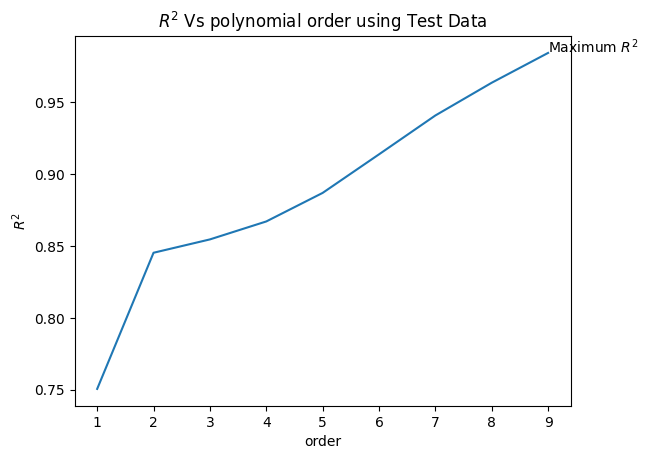

In [ ]:
R_squared = []
order = range(1,10)
for n in order:
  Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=n, include_bias=False)), ('model', LinearRegression())]
  pipe=Pipeline(Input)
  Z = Z.astype(float)
  pipe.fit(Z,Y)
  ypipe=pipe.predict(Z)
  R_squared.append(r2_score(Y,ypipe))
  #print('Method pipe R^2=', r2_score(Y,ypipe))
  #print('Method pipe MSE=', mean_squared_error(Y, ypipe))
print(R_squared)
max_index = np.argmax(R_squared)
max_x = order[max_index]
max_y = R_squared[max_index]
plt.plot(order, R_squared)
plt.xlabel('order')
plt.ylabel('$R^2$')
plt.title('$R^2$ Vs polynomial order using Test Data')
plt.text(max_x, max_y, 'Maximum $R^2$')
plt.show()
plt.close()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
RigeModel = Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
yhat = RigeModel.predict(x_test)
print('Test data: R^2=',RigeModel.score(x_test, y_test))
print('Test data: MSE=', mean_squared_error(y_test, yhat))


Test data: R^2= 0.5546864493649876
Test data: MSE= 58686234.02507031


In [ ]:
pr = PolynomialFeatures()
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RigeModel_pr = Ridge(alpha=0.1)
RigeModel_pr.fit(x_train_pr, y_train)
yhat_pr = RigeModel_pr.predict(x_test_pr)
print('predicted:', yhat_pr[0:4].round(2).ravel())
print('test set :', y_test[0:4].values.ravel())
mse_pr = mean_squared_error(y_test, yhat_pr)
r2_score_pr = RigeModel_pr.score(x_test_pr, y_test)
print('MSE for multi-variable polynomial yhat_pr is:', mse_pr)
print('R^2 for multi-variable polynomial yhat_pr is:', r2_score_pr)

predicted: [32491.27  8291.46  8291.46  8291.46]
test set : [40419.02  3077.1   6238.3   1391.53]
MSE for multi-variable polynomial yhat_pr is: 58688369.66494231
R^2 for multi-variable polynomial yhat_pr is: 0.5546702440420515


max R^2 for train data: 0.6366010369315254 corresponding alpha 0.001
max R^2 for test data: 0.554814865701055 corresponding alpha 0.999


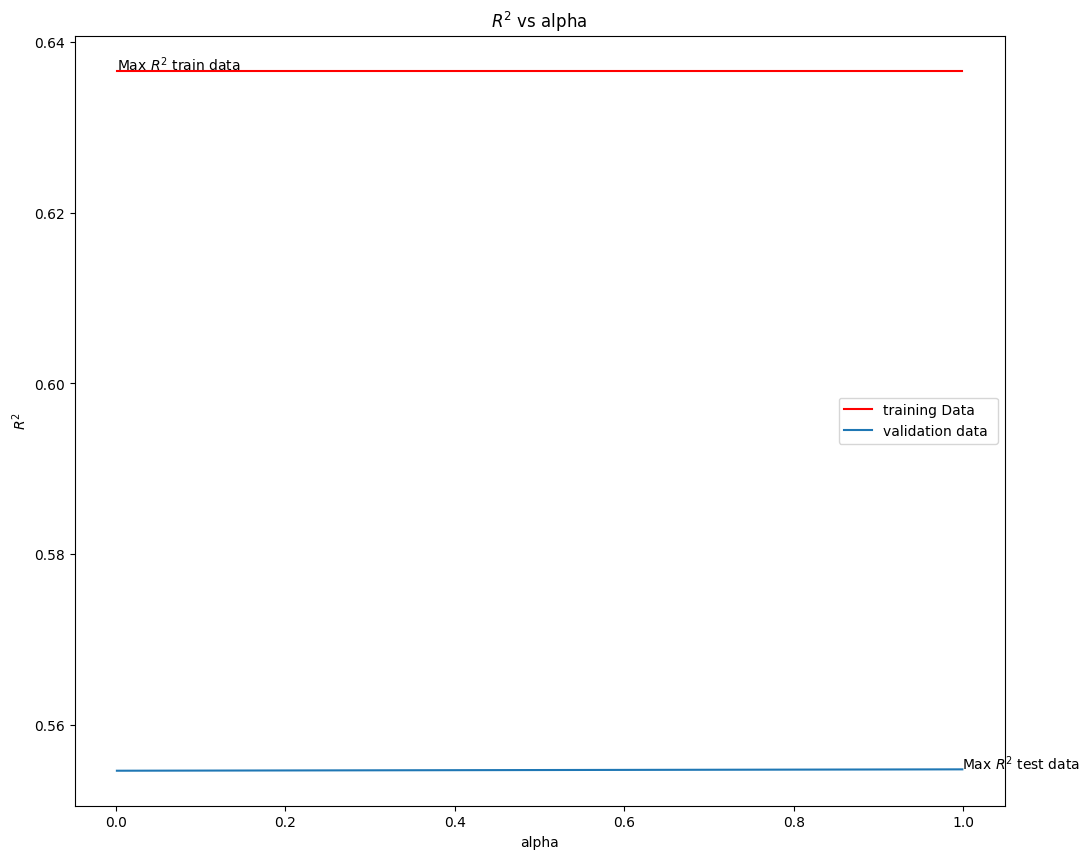

In [ ]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
#pbar = tqdm(Alpha)
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

for alpha in Alpha: #in pbar:
  RigeModel = Ridge(alpha=alpha)
  RigeModel.fit(x_train_pr, y_train)
  Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
  Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

max_index_train = np.argmax(Rsqu_train)
max_index_test = np.argmax(Rsqu_test)
max_x_train = Alpha[max_index_train]
max_y_train = Rsqu_train[max_index_train]
max_x_test = Alpha[max_index_test]
max_y_test = Rsqu_test[max_index_test]

print('max R^2 for train data:', max_y_train, 'corresponding alpha', max_x_train)
print('max R^2 for test data:', max_y_test, 'corresponding alpha', max_x_test)

width = 12
height = 10
plt.figure(figsize=(width,height))

plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.plot(Alpha, Rsqu_test, label='validation data ')
plt.title('$R^2$ vs alpha')
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.text(max_x_train, max_y_train, 'Max $R^2$ train data')
plt.text(max_x_test, max_y_test, 'Max $R^2$ test data')

plt.legend()

plt.show()
plt.close()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
#pbar = tqdm(Alpha)
order = range(1,5)
for n in order:
  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train)
  x_test_pr = pr.fit_transform(x_test)

  for alpha in Alpha: #in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))
print('R^2 test max :', max(Rsqu_test))
print('R^2 train max:', max(Rsqu_train))
  #max_index_train = np.argmax(Rsqu_train)
  #max_index_test = np.argmax(Rsqu_test)
  #max_x_train = Alpha[max_index_train]
  #max_y_train = Rsqu_train[max_index_train]
  #max_x_test = Alpha[max_index_test]
  #max_y_test = Rsqu_test[max_index_test]

  #print('max R^2 for train data:', max_y_train, 'corresponding alpha', max_x_train)
  #print('max R^2 for test data:', max_y_test, 'corresponding alpha', max_x_test)

  #width = 12
  #height = 10
  #plt.figure(figsize=(width,height))

  #plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
  #plt.plot(Alpha, Rsqu_test, label='validation data ')
  #plt.title('$R^2$ vs alpha')
  #plt.xlabel('alpha')
  #plt.ylabel('$R^2$')
  #plt.text(max_x_train, max_y_train, 'Max $R^2$ train data')
  #plt.text(max_x_test, max_y_test, 'Max $R^2$ test data')

  #plt.legend()

  #plt.show()
  #plt.close()

R^2 test max : 0.5997308694250664
R^2 train max: 0.6309553524628304


In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
  width = 12
  height = 10
  plt.figure(figsize=(width,height))

  ax1 = sns.kdeplot(RedFunction, color='r', label=RedName)
  ax2 = sns.kdeplot(BlueFunction, color='b', label=BlueName, ax=ax1)

  plt.title(Title)
  plt.xlabel('Price (in dollars)')
  plt.ylabel('Proportion of Insurances')

  plt.legend()

  plt.show()
  plt.close()

The best R^2 is: 0.5565778518927843


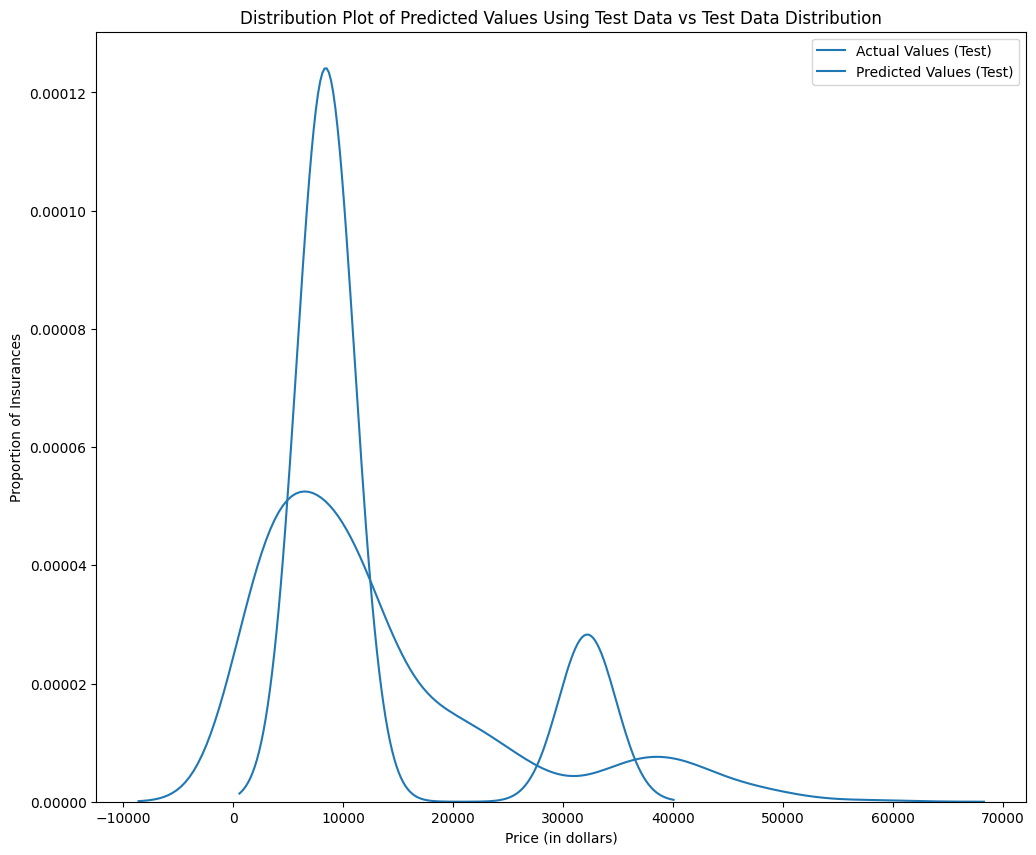

In [ ]:
parameters1 = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10]}]
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(X, Y)
BestRR = Grid1.best_estimator_
R_sqr_test = BestRR.score(x_test, y_test)
print('The best R^2 is:', R_sqr_test)
yhat_test = BestRR.predict(x_test)
Title = 'Distribution Plot of Predicted Values Using Test Data vs Test Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)